<a href="https://colab.research.google.com/github/Mewsab/Soccer-Rugby-Classification/blob/main/Soccer_vs_Rugby_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [6]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Soccer vs Rugby/input/train'  # Train path for soccer/rugby
test_dir = '/content/drive/MyDrive/Soccer vs Rugby/input/test'    # Test path for soccer/rugby

In [7]:
import os
print(len(os.listdir('/content/drive/MyDrive/Soccer vs Rugby/input/train/soccer')))
print(len(os.listdir('/content/drive/MyDrive/Soccer vs Rugby/input/train/rugby')))
print(len(os.listdir('/content/drive/MyDrive/Soccer vs Rugby/input/test/soccer')))
print(len(os.listdir('/content/drive/MyDrive/Soccer vs Rugby/input/test/rugby')))

500
500
100
100


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (soccer vs. rugby)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [9]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [10]:
# create CNN model - custom-made

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [12]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 218s 8s/step - accuracy: 0.5278 - loss: 0.9368 - val_accuracy: 0.5000 - val_loss: 0.6989
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 441ms/step - accuracy: 0.5846 - loss: 0.6757 - val_accuracy: 0.6450 - val_loss: 0.6466
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 446ms/step - accuracy: 0.7236 - loss: 0.5612 - val_accuracy: 0.6750 - val_loss: 0.6342
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 443ms/step - accuracy: 0.8152 - loss: 0.4562 - val_accuracy: 0.5850 - val_loss: 0.7308
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 430ms/step - accuracy: 0.8684 - loss: 0.3188 - val_accuracy: 0.6550 - val_loss: 0.7015
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 440ms/step - accuracy: 0.9242 - loss: 0.2307 - val_accuracy: 0.6150 - val_loss: 1.3587
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 451ms/step - accuracy: 0.9752 - loss: 0.0788 - val_accuracy: 0.6150 - val_loss: 1.3191
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 453ms/step - accuracy: 0.9901 - loss: 0.0653 - val_accura

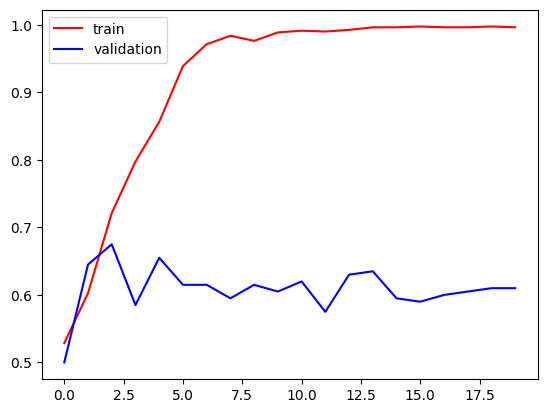

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

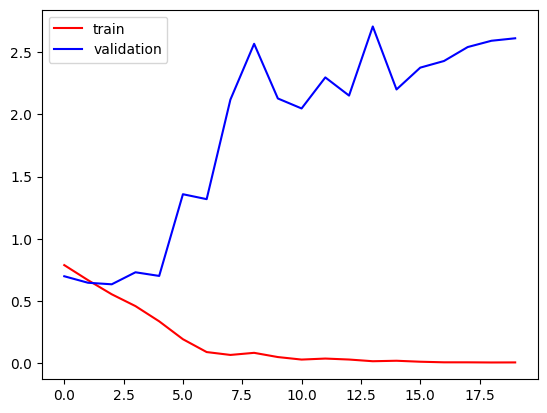

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


In [16]:
#predict the test data
predictions = model.predict(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 5s/step


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[46 54]
 [53 47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       100
           1       0.47      0.47      0.47       100

    accuracy                           0.47       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.46      0.47      0.46       200



In [18]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 476ms/step - accuracy: 0.5756 - loss: 6.4454 - val_accuracy: 0.4950 - val_loss: 6.5086
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 430ms/step - accuracy: 0.6856 - loss: 3.4719 - val_accuracy: 0.5050 - val_loss: 2.7728
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 549ms/step - accuracy: 0.7133 - loss: 2.3318 - val_accuracy: 0.5150 - val_loss: 2.1144
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 426ms/step - accuracy: 0.7538 - loss: 1.7271 - val_accuracy: 0.4950 - val_loss: 11.5508
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 436ms/step - accuracy: 0.7286 - loss: 1.8049 - val_accuracy: 0.5000 - val_loss: 7.0775
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 429ms/step - accuracy: 0.8051 - loss: 0.9275 - val_accuracy: 0.5000 - val_loss: 6.9180
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 400ms/step - accuracy: 0.8532 - loss: 0.7959 - val_accuracy: 0.4900 - val_loss: 3.5543
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 452ms/step - accuracy: 0.8830 - loss: 0.5810 - val_acc

In [21]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


In [22]:
predictions = model.predict(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step


In [23]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[36 64]
 [38 62]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.49      0.36      0.41       100
           1       0.49      0.62      0.55       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.49      0.49      0.48       200



In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

In [25]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 765ms/step - accuracy: 0.4547 - loss: 3.9673 - val_accuracy: 0.5650 - val_loss: 0.9759
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 439ms/step - accuracy: 0.6135 - loss: 0.7194 - val_accuracy: 0.6900 - val_loss: 0.5972
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 442ms/step - accuracy: 0.6302 - loss: 0.6191 - val_accuracy: 0.5250 - val_loss: 0.8362
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 433ms/step - accuracy: 0.5892 - loss: 0.7293 - val_accuracy: 0.6900 - val_loss: 0.5766
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 522ms/step - accuracy: 0.7023 - loss: 0.5950 - val_accuracy: 0.6650 - val_loss: 0.5766
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 421ms/step - accuracy: 0.6764 - loss: 0.5837 - val_accuracy: 0.6900 - val_loss: 0.5631
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 406ms/step - accuracy: 0.7045 - loss: 0.5350 - val_accuracy: 0.6600 - val_loss: 0.6363
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 435ms/step - accuracy: 0.6743 - loss: 0.5732 - val_accu

In [27]:
predictions = resnet_model.predict(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 878ms/step


In [28]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[59 41]
 [58 42]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.50      0.59      0.54       100
           1       0.51      0.42      0.46       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200

